<a href="https://colab.research.google.com/github/khandelwal1997/Machine-Learning-Projects/blob/main/Text_Mininig_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Library


In [ ]:
import os

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(os.getcwd())

/content


In [ ]:
## DATA UPLODING

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path= "/content/drive/MyDrive/ass3python.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
df

,Unnamed: 0,Plot,Title,imdbVotes,Poster,imdbRating,Genre,imdbID,Year,Language,differece
0,368,A secret software created by the American gove...,Lethal Commission,1084,http://ia.media-imdb.com/images/M/MV5BODUyNDI1...,64,Action,tt2319919,2012,English,1040400.00
1,298,"In this action flick, JUDE ST. CLERE discovers...",The Lackey,2672,http://ia.media-imdb.com/images/M/MV5BMjAwODIx...,71,Action,tt2197884,2012,English,6765201.00
2,3315,Eddy (Jayaprakash Reddy) is a powerful mafia l...,Nijam,803,NaN,6.5,Action,tt0368896,2003,Telugu,634412.25
3,1142,Co-Director Tom Logan discusses the making of ...,Feature Commentary with Director Tom Logan,1421,http://ia.media-imdb.com/images/M/MV5BMTUzNDQ4...,68,Action,tt3099258,2013,English,1830609.00
4,1257,"In a nuclear plant disaster, five teenagers fi...",Lock Down,1887,http://ia.media-imdb.com/images/M/MV5BMTgwMDg1...,54,Action,tt2349962,2013,English,3359889.00
...,...,...,...,...,...,...,...,...,...,...,...
3384,1649,The Gold Rush Expedition Race is one of the fo...,2012 Gold Rush Expedition Race,2718,NaN,87,Sport,tt4149040,2013,English,6922161.00
3385,1497,17 Seconds' is a unique project that doesn't j...,17 Seconds,1421,NaN,52,Sport,tt3328724,2013,English,1874161.00
3386,2115,Lone Star Holy War is a sports documentary hig...,Lone Star Holy War,2718,NaN,87,Sport,tt4254746,2014,English,6922161.00
3387,2947,Aks is the story of a hunter and his prey. A c...,Aks,1151,http://ia.media-imdb.com/images/M/MV5BMTUxOTg1...,5.9,"Thriller, Mystery",tt0289845,2001,Hindi,1311254.01


In [ ]:
df=df[['Plot']]

In [ ]:
df.shape

(3389, 1)

In [ ]:
df.dtypes

Plot    object
dtype: object

In [ ]:
df.info

<bound method DataFrame.info of                                                    Plot
0     A secret software created by the American gove...
1     In this action flick, JUDE ST. CLERE discovers...
2     Eddy (Jayaprakash Reddy) is a powerful mafia l...
3     Co-Director Tom Logan discusses the making of ...
4     In a nuclear plant disaster, five teenagers fi...
...                                                 ...
3384  The Gold Rush Expedition Race is one of the fo...
3385  17 Seconds' is a unique project that doesn't j...
3386  Lone Star Holy War is a sports documentary hig...
3387  Aks is the story of a hunter and his prey. A c...
3388  Karan is a lazy good-for-nothing who lives on ...

[3389 rows x 1 columns]>

In [ ]:
df.describe()

,Plot
count,3389
unique,3382
top,Shah Rukh Khan and Sharad Kapoor are the leade...
freq,2


In [ ]:
from textblob import TextBlob

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import string
import nltk 


In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 25.5 MB/s 


In [ ]:
pip install textmining

     |████████████████████████████████| 1.9 MB 16.6 MB/s 
  Created wheel for textmining: filename=textmining-1.0-py3-none-any.whl size=1855282 sha256=524fb918372644762b2bcb684b3fc3f79c2b1c25de77ef6c55c1e6fb2d6f212e
  Stored in directory: /root/.cache/pip/wheels/aa/94/34/ff5c55ab4907bdea6430dd97118de43202a84c7f24f006c9a2
Successfully built textmining


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

REMOAL OF STOPWORDS,PUCTUATION,NUMBERS


In [ ]:
stop= set(stopwords.words("english"))

In [ ]:
exclude=set(string.punctuation)

In [ ]:
def clean(doc):
  stop_free=" ".join([i for i in doc.lower().split() if i not in stop ])
  punch=" ".join([ch for ch in stop_free.lower().split() if ch not in exclude])
  num_free=" ".join([i for i in punch.lower().split() if not i.isdigit() ])
  return  num_free


In [ ]:
post_corpus=[clean(df.iloc[i,0]) for i in range(0,df.shape[0])]

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

WORDCLOUD

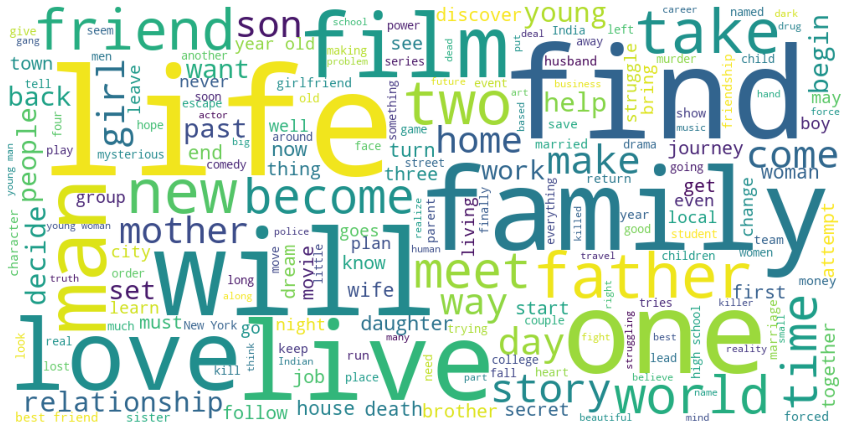

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(df['Plot']))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

SENTIMENT ANALYSIS USING TEXT BLOB AND VADERSENTIMENT

In [ ]:
FinalResults = pd.DataFrame()

# Run Engine
for i in range(0, df.shape[0]):
    
    blob = TextBlob(df.iloc[i,0])
    
    temp = pd.DataFrame({'Plot': df.iloc[i,0], 'Polarity': blob.sentiment.polarity}, index = [0])
    
    FinalResults = FinalResults.append(temp) 

In [ ]:
FinalResults

,Plot,Polarity
0,A secret software created by the American gove...,-0.025000
0,"In this action flick, JUDE ST. CLERE discovers...",-0.092424
0,Eddy (Jayaprakash Reddy) is a powerful mafia l...,0.039603
0,Co-Director Tom Logan discusses the making of ...,0.000000
0,"In a nuclear plant disaster, five teenagers fi...",0.000000
...,...,...
0,The Gold Rush Expedition Race is one of the fo...,-0.133333
0,17 Seconds' is a unique project that doesn't j...,0.214286
0,Lone Star Holy War is a sports documentary hig...,0.068750
0,Aks is the story of a hunter and his prey. A c...,-0.050000


In [ ]:
FinalResults_Vader = pd.DataFrame()

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for i in range(0, df.shape[0]):
    
    snt = analyzer.polarity_scores(df.iloc[i,0])
    
    temp = pd.DataFrame({'Plot': df.iloc[i,0], 'Polarity': list(snt.items())[3][1]}, index = [0])

    FinalResults_Vader = FinalResults_Vader.append(temp)

In [ ]:
FinalResults_Vader

,Plot,Polarity
0,A secret software created by the American gove...,0.8020
0,"In this action flick, JUDE ST. CLERE discovers...",-0.8999
0,Eddy (Jayaprakash Reddy) is a powerful mafia l...,-0.9901
0,Co-Director Tom Logan discusses the making of ...,0.0000
0,"In a nuclear plant disaster, five teenagers fi...",-0.7717
...,...,...
0,The Gold Rush Expedition Race is one of the fo...,0.5423
0,17 Seconds' is a unique project that doesn't j...,0.6858
0,Lone Star Holy War is a sports documentary hig...,-0.9001
0,Aks is the story of a hunter and his prey. A c...,0.9153
